<a href="https://colab.research.google.com/github/ramandeepp1403/Walmart-analysis/blob/main/walmartproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from scipy.stats import zscore,pearsonr
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/Walmart DataSet.csv')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
#checking if there's any null or duplicate value
df.isnull().sum().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
#stats summary
store_summary= df.groupby('Store')['Weekly_Sales'].agg(['mean','median','sum','std']).reset_index()
print(store_summary.head())

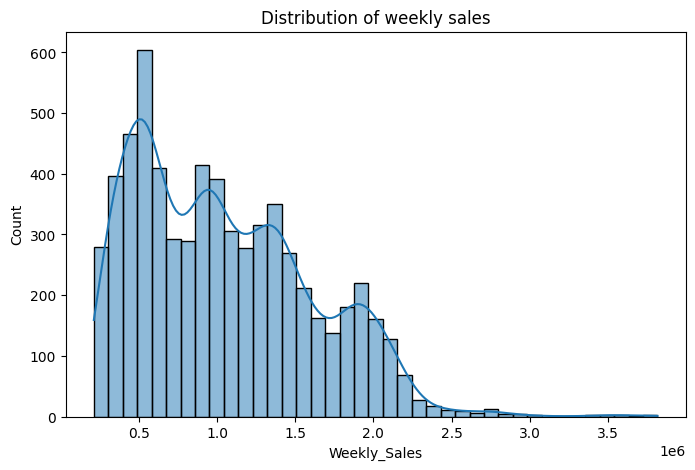

In [ ]:
#visualization part
plt.figure(figsize=(8,5))
sns.histplot(df['Weekly_Sales'],kde=True)
plt.title('Distribution of weekly sales')
plt.show()

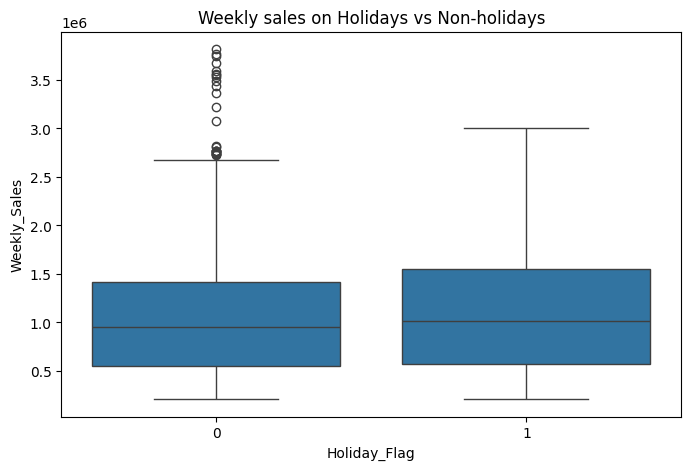

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Holiday_Flag',y='Weekly_Sales',data=df)
plt.title('Weekly sales on Holidays vs Non-holidays')
plt.show()

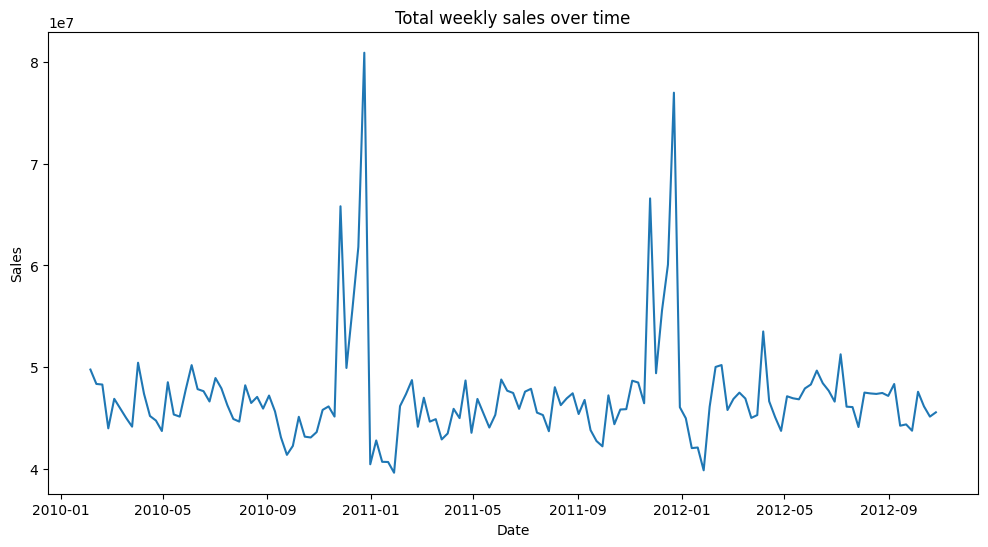

In [ ]:
#time series trend:
sales_over_time= df.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(sales_over_time['Date'],sales_over_time['Weekly_Sales'])
plt.title('Total weekly sales over time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()



In [ ]:
#outlier
Q1= df['Weekly_Sales'].quantile(0.25)
Q3= df['Weekly_Sales'].quantile(0.75)
IQR= Q3-Q1
lb= Q1-1.5*IQR
ub=Q3+1.5*IQR
outliers= df[(df['Weekly_Sales']<lb)&(df['Weekly_Sales']>ub)]
print("Number of outliers:",len(outliers))

Number of outliers: 0


In [ ]:
df.columns


Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

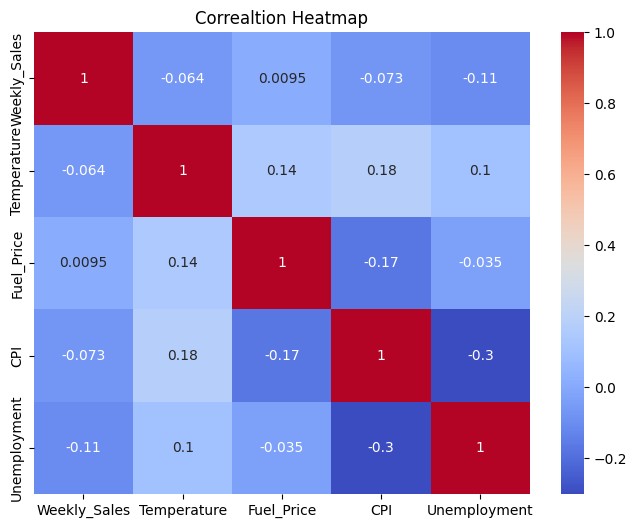

In [ ]:
#correlation
plt.figure(figsize=(8,6))
sns.heatmap(df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']].corr(),annot=True,cmap='coolwarm')
plt.title("Correaltion Heatmap")
plt.show()

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
#a.Weekly Sales and Unemployment per Store
unemp_weekly_sales = (df.groupby("Store")[["Weekly_Sales", "Unemployment"]]
      .corr()
      .reset_index()
)
unemp_weekly_sales = unemp_weekly_sales[unemp_weekly_sales['level_1'] == 'Weekly_Sales']
unemp_weekly_sales = unemp_weekly_sales[['Store','Unemployment']]
unemp_weekly_sales.columns = ['Store','corr_unemployment']
unemp_weekly_sales = unemp_weekly_sales.sort_values("corr_unemployment")

print("Top 10 stores suffering most due to unemployment effect:")
print(unemp_weekly_sales.head(10))


Top 10 stores suffering most due to unemployment effect:
    Store  corr_unemployment
74     38          -0.785290
86     44          -0.780076
76     39          -0.384681
82     42          -0.356355
80     41          -0.350630
6       4          -0.337015
32     17          -0.263600
4       3          -0.230413
72     37          -0.221287
8       5          -0.207043


a- yes ,weekly sales are affected by unemployment rate.The affected ones are listed above.
negative correlation shows that unemployment increases weekly sales decreases.


In [ ]:
#b- If the weekly sales show a seasonal trend, when and what could be the reason?

weekly_sales= df.groupby("Date")['Weekly_Sales'].sum()

In [ ]:
decomposition= seasonal_decompose(weekly_sales,model="additive",period=52)

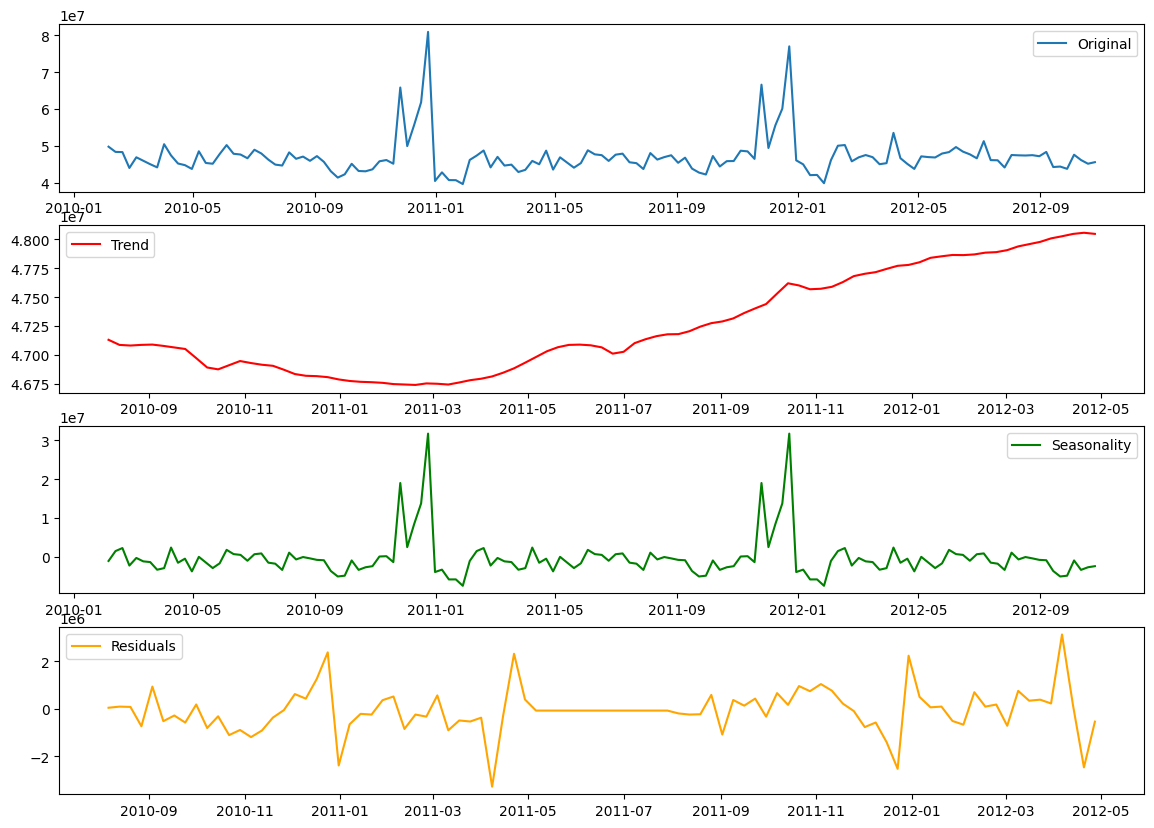

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(weekly_sales,label='Original')
plt.legend(loc="best")

plt.subplot(412)
plt.plot(decomposition.trend,label="Trend",color="red")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(decomposition.seasonal,label="Seasonality",color="green")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(decomposition.resid,label="Residuals",color="orange")
plt.legend(loc="best")
plt.show()

b-According to the analysis it indicates a clear seasonal pattern in sales.Seeking the trend of graph and its peakness is likely during festive shopping and holidays like in the months of November-December and whereas the months like january -february experince slowdown


In [ ]:
# c: Does temperature affect weekly sales in any manner

temp_sales= df.groupby("Store")[["Weekly_Sales","Temperature"]].corr().reset_index()


In [ ]:
temp_sales = (df.groupby("Store")[["Weekly_Sales", "Temperature"]].corr().unstack().iloc[:, 1].reset_index())

temp_sales.columns = ["Store", "corr_temperature"]

temp_sales = temp_sales.sort_values("corr_temperature")

print("Top 10 stores with strongest negative correlation (sales drop when temperature rises):")
print(temp_sales.head(10))
print("\nTop 10 stores with strongest positive correlation (sales rise with higher temperature):")
print(temp_sales.tail(10))


Top 10 stores with strongest negative correlation (sales drop when temperature rises):
    Store  corr_temperature
9      10         -0.432569
11     12         -0.379416
2       3         -0.377524
27     28         -0.376506
29     30         -0.330816
7       8         -0.312324
36     37         -0.300493
1       2         -0.297673
33     34         -0.278523
10     11         -0.278503

Top 10 stores with strongest positive correlation (sales rise with higher temperature):
    Store  corr_temperature
38     39          0.064738
16     17          0.081012
39     40          0.090598
42     43          0.095272
40     41          0.106761
23     24          0.111833
26     27          0.121809
15     16          0.182948
25     26          0.211722
43     44          0.267822


c-the corealtion is generaly negative approx ~-0.2 to ~ -0.4 .
Therefore sales slightly decrease as temperature increases although in the below part some stores even showcase + correaltion beacuase they may likely to sell summer seasoanl relted items.

Hotter weeks= lower sales
due to low visiting of customrs in region and weather patterns


In [ ]:
#d: How is the Consumer Price index affecting the weekly sales of various stores?

In [ ]:
cpi_sales= (
    df.groupby('Store')[["Weekly_Sales","CPI"]].corr().unstack().iloc[:,1].reset_index())

In [ ]:
cpi_sales.columns=["Store","corr_CPI"]
cpi_sales= cpi_sales.sort_values("corr_CPI")
overall_cpi_corr= df['Weekly_Sales'].corr(df['CPI'])
print("Overall correlation between weekly sales and CPI:",overall_cpi_corr)
print("\nTop 10 stores most negatively affected by CPI")
print(cpi_sales.head(10))
print("\nTop 10 stores most positively correalated with CPI:")
print(cpi_sales.tail(10))

Overall correlation between weekly sales and CPI: -0.07263416204017631

Top 10 stores most negatively affected by CPI
    Store  corr_CPI
35     36 -0.915095
34     35 -0.424107
13     14 -0.419755
29     30 -0.298188
42     43 -0.285686
26     27 -0.213082
17     18 -0.193541
14     15 -0.174467
20     21 -0.163649
18     19 -0.155341

Top 10 stores most positively correalated with CPI:
    Store  corr_CPI
8       9  0.294805
4       5  0.308261
2       3  0.317250
16     17  0.348571
3       4  0.351157
41     42  0.360859
40     41  0.392293
38     39  0.428043
43     44  0.740150
37     38  0.812837


d-CPI seems a negative impact on weekly sales that means when prices and inflation go up people buy less,leading to lower sales.ON CONTRARY , few stores show + correlation they dont seem affected maybe beacuse of thier location .Generally prices lead to drop in weekly sales

In [ ]:
#e-Top performing stores according to the historical data
def compute_top_stores(df, metrics=['revenue', 'units_sold'], period_col='date', store_col='store_id', top_n=5):
    df[period_col] = pd.to_datetime(df[period_col])
    return (df.groupby(store_col)[metrics]
              .sum()
              .sort_values(by=metrics, ascending=False)
              .head(top_n)
              .reset_index())

if __name__ == '__main__':
    data = {
        'store_id': ['A', 'A', 'B', 'C', 'B', 'C', 'D', 'E', 'E', 'D'],
        'date': ['2025-01-01','2025-01-02','2025-01-01','2025-01-01','2025-01-02',
                 '2025-01-02','2025-01-01','2025-01-01','2025-01-02','2025-01-02'],
        'revenue': [100, 150, 200, 120, 180, 160, 90, 300, 100, 110],
        'units_sold': [10, 15, 20, 12, 18, 16, 9, 30, 10, 11]
    }
    df = pd.DataFrame(data)
    print(compute_top_stores(df, top_n=5))




  store_id  revenue  units_sold
0        E      400          40
1        B      380          38
2        C      280          28
3        A      250          25
4        D      200          20


e-the top performing stores the top 5 are shown above.They perform the best based on the revenue and the no of units sold.

In [ ]:
#f-The worst performing store, and how significant is the difference between the highest and lowest performing stores.


def compare_store_performance(df, store_col='store_id', metric='revenue'):
    store_totals = df.groupby(store_col)[metric].sum().reset_index()
    best_store = store_totals.loc[store_totals[metric].idxmax()]
    worst_store = store_totals.loc[store_totals[metric].idxmin()]


    gap = best_store[metric] - worst_store[metric]
    percent_diff = (gap / best_store[metric]) * 100

    print(f"Top Store: {best_store[store_col]} with {best_store[metric]:,.2f} {metric}")
    print(f"Lowest Store: {worst_store[store_col]} with {worst_store[metric]:,.2f} {metric}")
    print(f"Performance gap: {gap:,.2f} ({percent_diff:.1f}% lower than top store)")



In [ ]:
if __name__ == '__main__':
    data = {
        'store_id': ['A', 'A', 'B', 'C', 'B', 'C', 'D', 'E', 'E', 'D'],
        'date': ['2025-01-01','2025-01-02','2025-01-01','2025-01-01','2025-01-02',
                 '2025-01-02','2025-01-01','2025-01-01','2025-01-02','2025-01-02'],
        'revenue': [100, 150, 200, 120, 180, 160, 90, 300, 100, 110],
        'units_sold': [10, 15, 20, 12, 18, 16, 9, 30, 10, 11]
    }
    df = pd.DataFrame(data)
    compare_store_performance(df)


Top Store: E with 400.00 revenue
Lowest Store: D with 200.00 revenue
Performance gap: 200.00 (50.0% lower than top store)


f-the worst peformance is given by store D and the best is store E.The store perfomance gap is 50%


In [ ]:
#2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks


In [ ]:
from prophet import Prophet

def forecast_sales(df, store_col='store_id', date_col='date', metric='revenue', weeks=12):
    df[date_col] = pd.to_datetime(df[date_col])
    forecasts = {}

    for store in df[store_col].unique():
        store_data = df[df[store_col] == store][[date_col, metric]].rename(columns={date_col: 'ds', metric: 'y'})
        model = Prophet()
        model.fit(store_data)

        future = model.make_future_dataframe(periods=weeks * 7, freq='D')
        forecast = model.predict(future)
        forecasts[store] = forecast[['ds', 'yhat']].tail(weeks * 7)

    return forecasts



In [ ]:
if __name__ == '__main__':
    data = {
        'store_id': ['A', 'A', 'B', 'C', 'B', 'C', 'D', 'E', 'E', 'D'],
        'date': ['2025-01-01','2025-01-02','2025-01-01','2025-01-01','2025-01-02',
                 '2025-01-02','2025-01-01','2025-01-01','2025-01-02','2025-01-02'],
        'revenue': [100, 150, 200, 120, 180, 160, 90, 300, 100, 110]
    }
    df = pd.DataFrame(data)
    forecasts = forecast_sales(df)
    for store, forecast in forecasts.items():
        print(f"\n Forecast for Store {store}:\n", forecast.tail(7))


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1_mo555v/9thbn6h8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1_mo555v/x7y1d40z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32609', 'data', 'file=/tmp/tmp1_mo555v/9thbn6h8.json', 'init=/tmp/tmp1_mo555v/x7y1d40z.json', 'output', 'file=/tmp/tmp1_mo555v/prophet_modelx_uglul9/prophet_model-20251012124321.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:43:21 - cmdstanpy - INFO - Chain [1] start processing
IN


 Forecast for Store A:
            ds         yhat
79 2025-03-21  4049.998773
80 2025-03-22  4099.998757
81 2025-03-23  4149.998741
82 2025-03-24  4199.998725
83 2025-03-25  4249.998709
84 2025-03-26  4299.998693
85 2025-03-27  4349.998676

 Forecast for Store B:
            ds         yhat
79 2025-03-21 -1379.999415
80 2025-03-22 -1399.999408
81 2025-03-23 -1419.999401
82 2025-03-24 -1439.999393
83 2025-03-25 -1459.999386
84 2025-03-26 -1479.999378
85 2025-03-27 -1499.999371

 Forecast for Store C:
            ds         yhat
79 2025-03-21  3279.998592
80 2025-03-22  3319.998574
81 2025-03-23  3359.998556
82 2025-03-24  3399.998538
83 2025-03-25  3439.998521
84 2025-03-26  3479.998503
85 2025-03-27  3519.998485

 Forecast for Store D:
            ds         yhat
79 2025-03-21  1670.003776
80 2025-03-22  1690.003823
81 2025-03-23  1710.003871
82 2025-03-24  1730.003918
83 2025-03-25  1750.003966
84 2025-03-26  1770.004013
85 2025-03-27  1790.004061

 Forecast for Store E:
            

2:
The forecast predicts strong growth for Stores A and C, while Stores B and E show alarming negative trends, suggesting either severe underperformance or modeling issues that need attention.